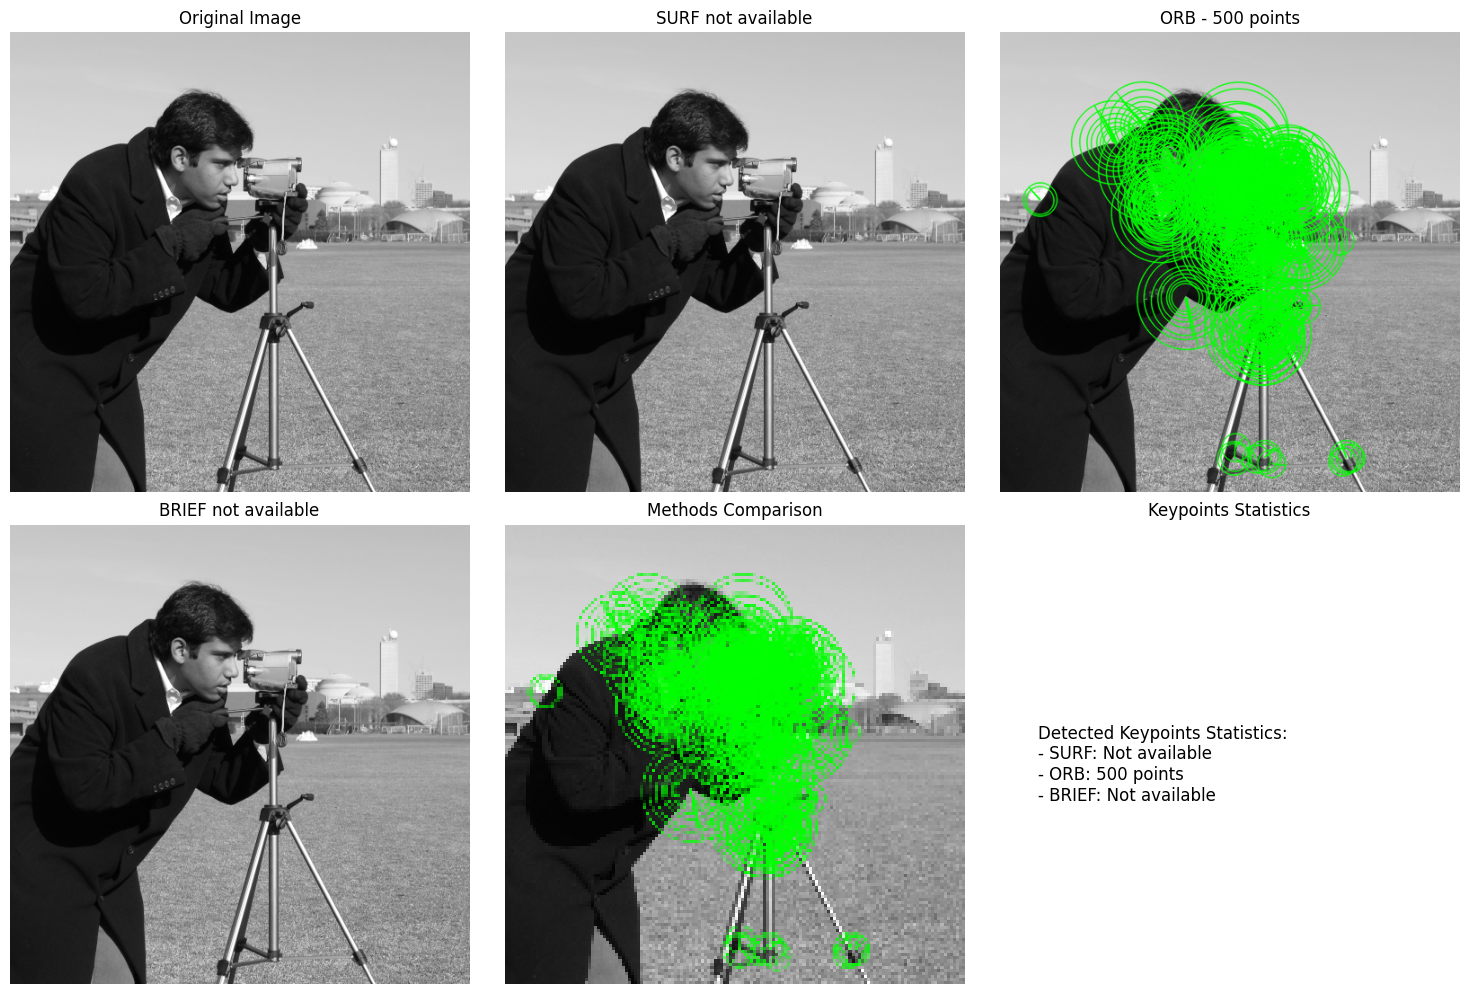

Detected Keypoints Information:
ORB: 500 keypoints


In [4]:
import cv2
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

# Load image
image = data.camera()

# 1. SURF (Speeded-Up Robust Features)
try:
    # Create SURF detector
    surf = cv2.xfeatures2d.SURF_create(hessianThreshold=1000)
    keypoints_surf, descriptors_surf = surf.detectAndCompute(image, None)

    # Draw SURF keypoints
    img_surf = cv2.drawKeypoints(image, keypoints_surf, None, (255, 0, 0),
                                cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    surf_available = True
except:
    img_surf = np.copy(image)
    surf_available = False

# 2. ORB (Oriented FAST and Rotated BRIEF)
# Create ORB detector
orb = cv2.ORB_create(nfeatures=500)
keypoints_orb, descriptors_orb = orb.detectAndCompute(image, None)

# Draw ORB keypoints
img_orb = cv2.drawKeypoints(image, keypoints_orb, None, (0, 255, 0),
                           cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 3. BRIEF (Binary Robust Independent Elementary Features)
# Use FAST detector with BRIEF descriptor
try:
    # Create FAST detector
    fast = cv2.FastFeatureDetector_create()
    keypoints_fast = fast.detect(image, None)

    # Create BRIEF descriptor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    keypoints_brief, descriptors_brief = brief.compute(image, keypoints_fast)

    # Draw BRIEF keypoints
    img_brief = cv2.drawKeypoints(image, keypoints_brief, None, (0, 0, 255),
                                 cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    brief_available = True
except:
    img_brief = np.copy(image)
    brief_available = False

# 4. Display results
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# SURF
plt.subplot(2, 3, 2)
if surf_available:
    plt.imshow(img_surf, cmap='gray')
    plt.title(f'SURF - {len(keypoints_surf)} points')
else:
    plt.imshow(image, cmap='gray')
    plt.title('SURF not available')
plt.axis('off')

# ORB
plt.subplot(2, 3, 3)
plt.imshow(img_orb, cmap='gray')
plt.title(f'ORB - {len(keypoints_orb)} points')
plt.axis('off')

# BRIEF
plt.subplot(2, 3, 4)
if brief_available:
    plt.imshow(img_brief, cmap='gray')
    plt.title(f'BRIEF - {len(keypoints_brief)} points')
else:
    plt.imshow(image, cmap='gray')
    plt.title('BRIEF not available')
plt.axis('off')

# Comparison between all methods
plt.subplot(2, 3, 5)
comparison_images = []
if surf_available:
    comparison_images.append(cv2.resize(img_surf, (150, 150)))
comparison_images.append(cv2.resize(img_orb, (150, 150)))
if brief_available:
    comparison_images.append(cv2.resize(img_brief, (150, 150)))

if comparison_images:
    comparison_img = np.hstack(comparison_images)
    plt.imshow(comparison_img, cmap='gray')
    plt.title('Methods Comparison')
plt.axis('off')

# Statistics
plt.subplot(2, 3, 6)
plt.axis('off')
stats_text = f"""
Detected Keypoints Statistics:
"""
if surf_available:
    stats_text += f"- SURF: {len(keypoints_surf)} points\n"
else:
    stats_text += "- SURF: Not available\n"

stats_text += f"- ORB: {len(keypoints_orb)} points\n"

if brief_available:
    stats_text += f"- BRIEF: {len(keypoints_brief)} points"
else:
    stats_text += "- BRIEF: Not available"

plt.text(0.1, 0.5, stats_text, fontsize=12, va='center')
plt.title('Keypoints Statistics')

plt.tight_layout()
plt.show()

# Print additional information
print("Detected Keypoints Information:")
if surf_available:
    print(f"SURF: {len(keypoints_surf)} keypoints")
print(f"ORB: {len(keypoints_orb)} keypoints")
if brief_available:
    print(f"BRIEF: {len(keypoints_brief)} keypoints")